# ch.3　Python을 이용한 데이터 분석

## 3.4 모집단에서 표본 추출 시뮬레이션

### 3.4.1 라이브러리 임포트

In [44]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 표시 자릿수 지정
%precision 3

# 주피터 노트북에 그래프 그려주기 위한 설정
%matplotlib inline

### 3.4.2 표본을 얻는 프로세스

표본 = 확률변수  
즉, 확률적으로 변화하는 값을 볼 수 있는 것이 표본이다.
  
현실이라면 여러번 얻어내지 못할 실현값을 파이썬에서 시뮬레이션 하면 다양한 실현값을 시뮬레이션 할 수 있다.  
"Life is short, We need Python!"

### 5마리 물고기의 예

In [45]:
#이 호수엔 물고기가 5마리 밖에 없다.
fish_5 = np.array([2,3,4,5,6])
fish_5

array([2, 3, 4, 5, 6])

In [46]:
# 이 중에 한 마리의 물고기를 낚아 올렸다 치자.
# 이 때 size를 지정해주면 샘플사이즈가 1이되고 (한마리만 건져 올렸다는 말.)
# replace=False라고 하면 같은 물고기를 2번 선택하지 않는다.

np.random.choice(fish_5, size = 1, replace = False)

array([4])

In [47]:
# 이번엔 3마리의 물고기를 낚아보자.
np.random.choice(fish_5, size = 3, replace = False)

array([3, 4, 6])

In [48]:
# 3마리를 한 번 더 낚아 올려보자
np.random.choice(fish_5, size = 3, replace = False)

array([6, 4, 2])

In [49]:
# 난수 seed사용하기
np.random.seed(1)
np.random.choice(fish_5, size = 3, replace = False)

array([4, 3, 6])

난수 시드를 지정하면 매번 같은 데이터가 랜덤하게 선택된다. 위의 결과는 시행을 할 때마다 다른 값을 보여주는 반면 난수를 지정했다면 계속해서 같은 값만 보야준다.

In [50]:
# seed(1)을 다시 시행해보자.
np.random.seed(1)
np.random.choice(fish_5, size = 3, replace = False)

array([4, 3, 6])

In [51]:
# 골라낸 표본의 평균값을 계산해보자
np.random.seed(1)
np.mean(np.random.choice(fish_5, size = 3, replace = False))

4.333333333333333

### 3.4.4 난수

난수: 랜덤으로 골라낸 값  
분야에 따라서 확률변수와 거의 같은 의미로 사용되기도 한다.

### 3.4.5 복원추출과 비복원추출

복원추출: 추출된 표본을 다시 모집단에 되돌려 놓는다.
- 중복조합, 중복순열
비복원추출: 추출된 표본을 모집단에 다시 돌려놓지 않는다.
- 조합, 순열
- 파이썬에선 replace = False 를 사용하면 비복원추출을 할 수 있다.

### 3.4.6 더 많은 물고기가 있는 호수에서 표본추출

In [52]:
# 호수에 물고기를 불러오자. 
fish_100000 = pd.read_csv(
    "3-4-1-fish_length_100000.csv")["length"]
fish_100000.head()

0    5.297442
1    3.505566
2    3.572546
3    3.135979
4    4.689275
Name: length, dtype: float64

In [53]:
# 호수에 있는 물고기의 수를 세보자.
len(fish_100000)

100000

In [54]:
# 10마리를 낚아 올려보자.
sampling_result = np.random.choice(
    fish_100000, size = 10, replace = False)
sampling_result

array([4.091, 5.465, 3.426, 4.287, 4.244, 4.282, 4.29 , 5.087, 2.769,
       5.296])

In [55]:
# 표본 10마리의 표본 평균을 구햐보자.
np.mean(sampling_result)

4.3235970793805025

### 3.4.7 모집단 분포

In [56]:
#모평균
np.mean(fish_100000)

4.000

In [57]:
#모표준편차
np.std(fish_100000, ddof = 0)

0.800

In [58]:
#모분산
np.var(fish_100000, ddof = 0)

0.640

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='length', ylabel='Density'>

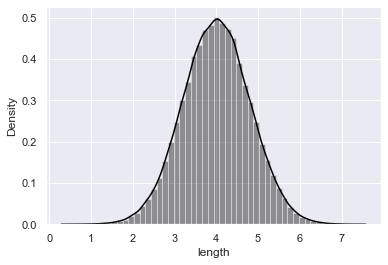

In [59]:
#모집단의 히스토그램
sns.distplot(fish_100000, color = 'black')

위의 그래프를 퍙균 4, 분산 0.64인 정규분포로 좀 더 확대해서 볼 수도 있다.

### 3.4.8 모집단분포와 정규분포 간 확률밀도함수 비교

In [60]:
#평균 4, 분산 0.064인 정규분포를 만들어보자.
x = np.arange(start = 1, stop = 7.1, step = 0.1)
x
# x = np.arange(1, 7.1, 0.1)로 쓸 수도 있다.

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. ])

In [61]:
# stats.norm.pdf를 하면 확률밀도를 구할 수 있다.
stats.norm.pdf(x = x, loc = 4, scale = 0.8)

# loc은 평균값이고, scale은 표준편차이다.
# e-04는 10의 마이너스 4승을 의미한다.

array([4.407e-04, 6.988e-04, 1.091e-03, 1.676e-03, 2.536e-03, 3.778e-03,
       5.540e-03, 7.998e-03, 1.137e-02, 1.591e-02, 2.191e-02, 2.971e-02,
       3.967e-02, 5.215e-02, 6.749e-02, 8.598e-02, 1.078e-01, 1.332e-01,
       1.619e-01, 1.938e-01, 2.283e-01, 2.648e-01, 3.025e-01, 3.401e-01,
       3.764e-01, 4.102e-01, 4.401e-01, 4.648e-01, 4.833e-01, 4.948e-01,
       4.987e-01, 4.948e-01, 4.833e-01, 4.648e-01, 4.401e-01, 4.102e-01,
       3.764e-01, 3.401e-01, 3.025e-01, 2.648e-01, 2.283e-01, 1.938e-01,
       1.619e-01, 1.332e-01, 1.078e-01, 8.598e-02, 6.749e-02, 5.215e-02,
       3.967e-02, 2.971e-02, 2.191e-02, 1.591e-02, 1.137e-02, 7.998e-03,
       5.540e-03, 3.778e-03, 2.536e-03, 1.676e-03, 1.091e-03, 6.988e-04,
       4.407e-04])

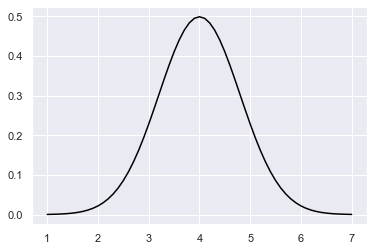

In [62]:
# 확률밀도 그래프 그리기 (3.3.4 참조)
plt.plot(x, 
         stats.norm.pdf(x = x, loc = 4, scale = 0.8), 
         color = 'black')
# 이 그래프에서 y 값은 stats.norm.pdf(x = x, loc = 4, scale = 0.8)이다.
# plt.plot은 꺾은선 그래프가 아닌 선 그래프를 그리는 함수인듯 하다.

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


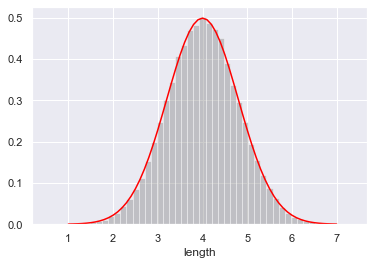

In [65]:
# 정규분포 확률밀도와 fish_100000의 히스토 그램 그래프 겹쳐 그리기.
sns.distplot(fish_100000, kde = False, norm_hist = True, color = 'gray')

plt.plot(x, 
         stats.norm.pdf(x = x, loc = 4, scale = 0.8), 
         color = 'red')

distplot 대신 displot이나 histplot을 사용하래서 사용했는데 이 경우 히스토그램 총 넓이를 1로 설정을 어떻게 하는지 모르겠다.

이 사이트가 좋은듯 하여 첨부한다.  
https://junstar92.tistory.com/90

### 3.4.9 표본을 얻는 절차의 추상화

stats.norm.rvs는 정규분포를 따르는 난수 생성 함수이다.
위의 fish_100000이 평균이 4, 분산이 0.64인 정규분포를 따르는 것을 알아냈으므로 정규분포에서 난수를 추출해도 같은 표본이 나올 것이다.

In [ ]:
sampling_norm = stats.norm.rvs(
    loc = 4, scale = 0.8, size = 10)
sampling_norm

In [ ]:
# 표본평균 구하기
np.mean(sampling_norm)

얼추 비슷한 평균값이 계속해서 나온다.

### 3.4.10 유한모집단 추정

앞의 내용은 논리적 비약이 2가지 있다.
1. 모집단의 히스토그램과 정규분포의 확률밀도가 같다고한 점
    - 히스토그램은 각진형태를 가지지만 정규분포의 확률밀도는 매끄럽게 변화하기 때문에 완전히 일치할 수 없다.
2. fish_100000이 다루는 물고기가 10만 마리라는 점
    - 10만 마리는 많은 숫자이지만 그렇다고 무한한 숫자도 아니다.
    - stats.norm.rvs 함수를 이용해서 난수 생성 시뮬레이션을 하면 이는 무한 모집단에서 생성된 것이다.
    
그럼에도 불구하고 이 책에선 10만마리의 물고기 모집단이 충분히 크다고 가정하고 진행한 결과이다.

### 3.4.11 모집단분포를 정규분포로 가정해도 좋은가
모집단분포가 정규분포에 완벽히 들어맞지는 않겠지만 정규분포라고 보고 계산을 한다.
  
  전수조사를 하지 않는 이상 모집단의 히스토그램을 그리는 것은 불가능 하지만 표본의 히스토그램을 그리는 과정 등을 통해 모집단의 분포를 가정할 수 있다.  
  정규분포, 일반선형모델 등이 나올 수 있을 것이다.